In [108]:



#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [120]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.io import read_image

import os

In [121]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = nn.Conv2d(3, 8, 5)
        self.l2 = nn.Conv2d(8, 64, 5)
        self.l3 = nn.Conv2d(64, 128, 5)
        self.l4 = nn.Conv2d(128, 256, 5)
        self.l5 = nn.Conv2d(256, 256, 5)
        self.l6 = nn.Linear(1024, 128)
        self.l7 = nn.Linear(128, len(CLASS_NAMES))
        
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.l2(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.l3(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.l4(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.l5(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.l6(x))
        x = self.l7(x)
                
        return x.double()

In [123]:
CLASS_NAMES = ['1 - 10', '11 - 20', '21 - 30', '31 - 45', '46 - 60', '61 - 116']

MODEL_PATH = os.path.join('Models', os.listdir('Models')[-1])
print(MODEL_PATH)

model = Model()
model.load_state_dict(torch.load(MODEL_PATH))

Models\Model-2023.9.7 16;25


<All keys matched successfully>

In [124]:
# TEXT CONSTANTS
# font
font = cv2.FONT_HERSHEY_SIMPLEX
# fontScale
fontScale = 1
# Blue color in BGR
color = (255, 0, 0)
# Line thickness of 2 px
thickness = 2
# Using cv2.putText() method
# image = cv2.putText(image, 'OpenCV', org, font, 
#                    fontScale, color, thickness, cv2.LINE_AA)

In [136]:
import cv2
import matplotlib.pyplot as plt


# filenames = ['a.JPG', 'b.JPG', 'c.JPG', 'd.JPG', 'e.JPG', 'f.JPG', 'g.JPG']
AVG_FRAME_COUNTER = 10

read_video = cv2.VideoCapture('Pulp Fiction.mp4')
if (read_video.isOpened() == False):
    print("Error opening video stream or file")
    
frame_width = int(read_video.get(3))
frame_height = int(read_video.get(4))
   
write_video = cv2.VideoWriter('video_bgr.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         30, (frame_width, frame_height))
    
# for imagePath in filenames:
# img = cv2.imread(imagePath)
last_ages = np.array([[] for i in range(AVG_FRAME_COUNTER)])
while read_video.isOpened():
    ret, frame = read_video.read()
    if not ret:
        break
    img = frame
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_classifier = cv2.CascadeClassifier(
        cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
    )
    faces = face_classifier.detectMultiScale(
        gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(80, 80)
    )
    

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_rgb = img
    
    del last_ages[0]
    last_ages.append([])
    
    for i, (x, y, w, h) in enumerate(faces):
        cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 4)
        face = img_rgb[y:y+h, x:x+w]
        face = cv2.resize(face, (200, 200))
        face = np.transpose(face, (2, 0, 1))
        pred = model(torch.Tensor([face])).detach().numpy()
        pred_class = np.argmax(pred)
        
        last_ages[-1].append(pred)
        
        previous_preds = np.array([])
        for j in range(AVG_FRAME_COUNTER):
            if len(last_ages[j]) > i:
                previous_preds += last_ages[j][i]
        print(previous_preds)
        counts = np.bincount(a)
        print(np.argmax(counts))
        
        img_rgb = cv2.putText(img_rgb, CLASS_NAMES[pred_class], (x, y), font, 
                   fontScale, color, thickness, cv2.LINE_AA)
    
    write_video.write(img_rgb)
read_video.release()
write_video.release()



#     plt.figure(figsize=(20,10))
#     plt.imshow(img_rgb)
#     plt.axis('off')
#     plt.show()

ValueError: cannot delete array elements

480 316 624 624


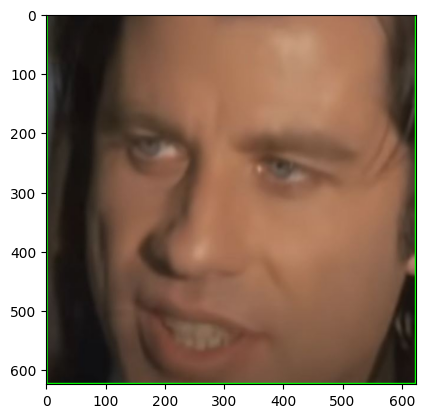

46 - 60


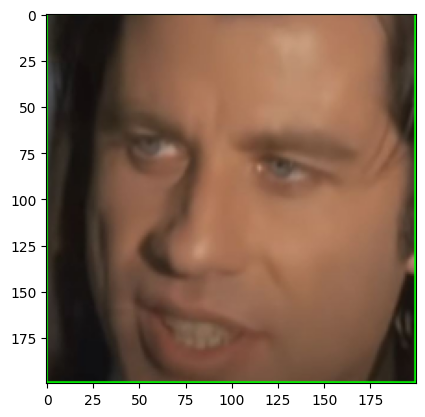